In [551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [552]:
#loading the data and loosing all Null values
df = pd.read_csv(r'framingham_heart_disease.csv')
df = df[['male','age','totChol','glucose','heartRate']]
original_size = df.shape[0]
df.dropna(how='any', inplace=True)
no_null_size = df.shape[0]
df.insert(loc=0,column='intercept',value=1)
print(f'Data size after dropping Null values is'
      f' {no_null_size/original_size * 100:0.3}% of the original data size')

Data size after dropping Null values is 90.6% of the original data size


In [553]:
# defining function to check age
def age_groups(age):

    if age<40:
        return "young"

    elif 40<= age <60 :
        return "middle-aged"

    else:
        return "old"

df['ageGroup'] = df['age'].apply(age_groups)

df['gender'] = df['male'].apply(lambda x: "male" if x==1 else "female")


In [554]:
#Randomlly pick 200 samples from the data
#male-to-female difference won't exceed 10%
np.random.seed(3)
sample_size = 200
flag=True
while flag: #will take another sample if there is one sex only
    sample = df.sample(200)
    counts_gender = sample[['male', 'heartRate']].groupby('male').count()
    male_count = counts_gender['heartRate'][1]
    female_count = counts_gender['heartRate'][0]
    if female_count != 0 and male_count != 0 :
        if abs(female_count - male_count) <= sample_size*0.1:
            flag = False

ageGroup     gender
middle-aged  female    69
             male      60
old          female    24
             male      20
young        female    16
             male      11
Name: ageGroup, dtype: int64

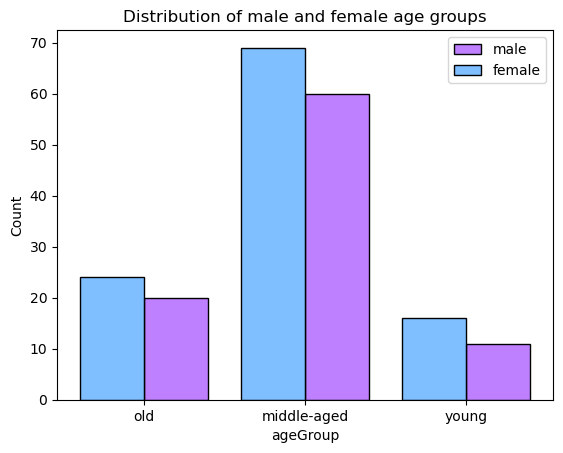

In [555]:
sns.histplot(data=sample, x="ageGroup", hue="gender", multiple="dodge", shrink=.8, palette="cool")
plt.legend(['male','female'])
plt.title("Distribution of male and female age groups")
sample.groupby(['ageGroup', 'gender'])['ageGroup'].count()

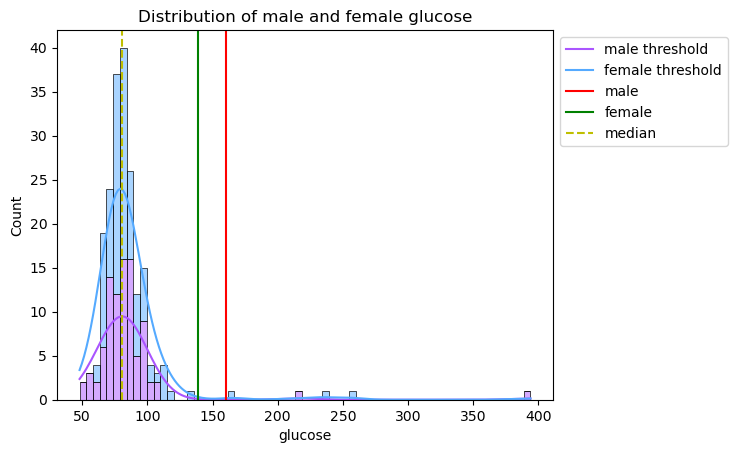

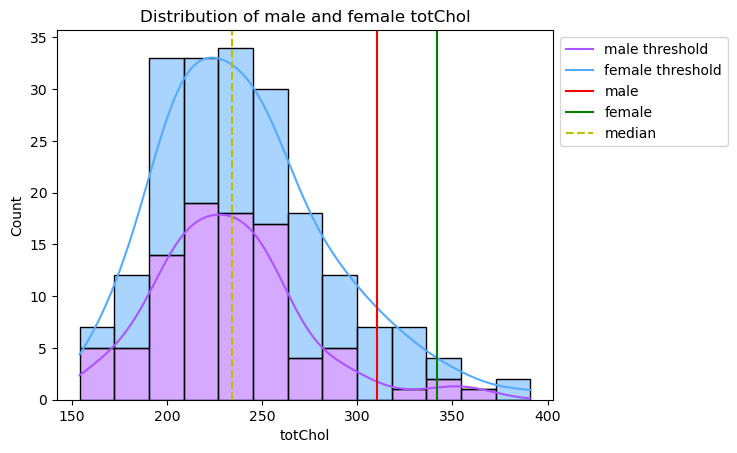

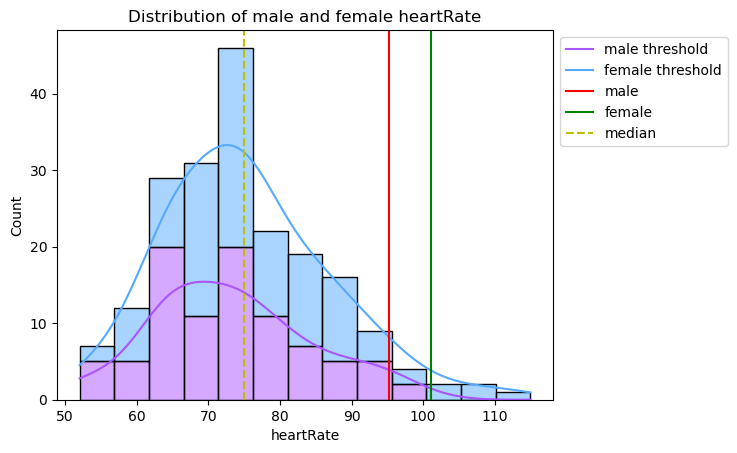

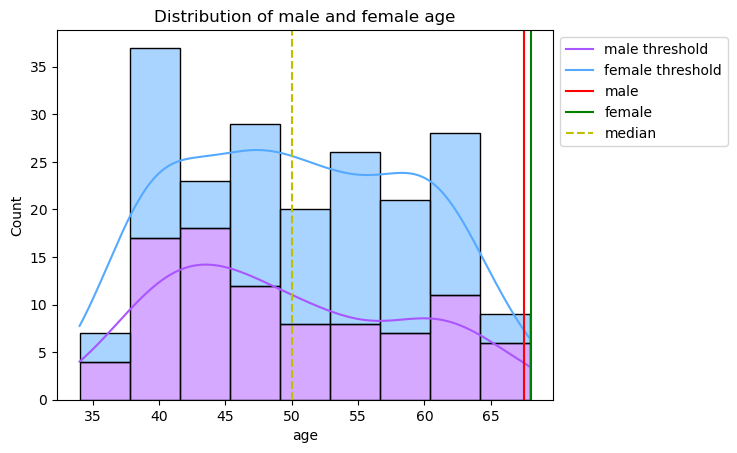

In [556]:
#ploting the distributions of all x values
#The thresholds indicate the "abnormal" values
variables = ['glucose','totChol','heartRate','age']
medians = {x:[np.median(sample[x])] for x in variables}
thresholds = {}
for x in variables:
    male_std = np.std(sample[sample['male']==1][x])
    female_std = np.std(sample[sample['male']==0][x])
    male_mean = np.mean(sample[sample['male']==1][x])
    female_mean = np.mean(sample[sample['male']==0][x])
    male_threshold = male_mean + 2*male_std
    female_threshold = female_mean + 2*female_std
    thresholds[x] = [male_threshold,female_threshold]
    sns.histplot(data=sample, x=x, hue="male", multiple="stack", palette="cool",kde=True)
    plt.legend(['male', 'female'])
    plt.title(f'Distribution of male and female {x}')
    plt.axvline(x = male_threshold, color = 'r', label = 'male threshold')
    plt.axvline(x = female_threshold, color = 'g', label = 'female threshold')
    plt.axvline(x = medians[x], color = 'y', ls='--', label = 'median')
    plt.legend(['male threshold','female threshold','male', 'female','median'],
               bbox_to_anchor = (1.0, 1), loc = 'upper left')
    plt.show()

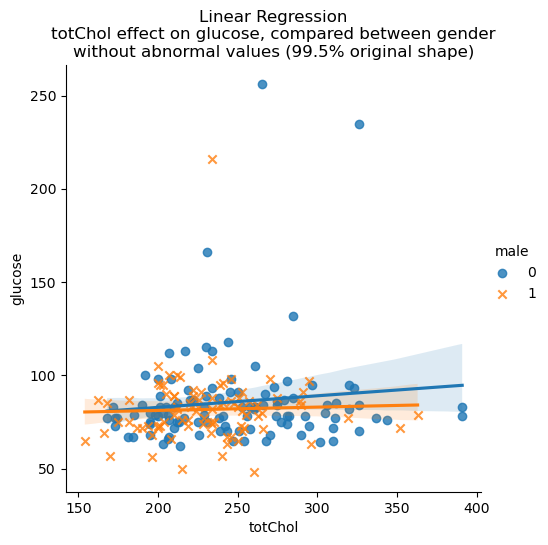

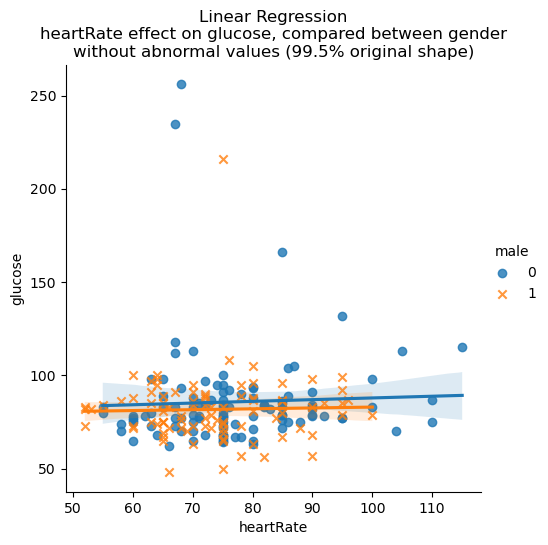

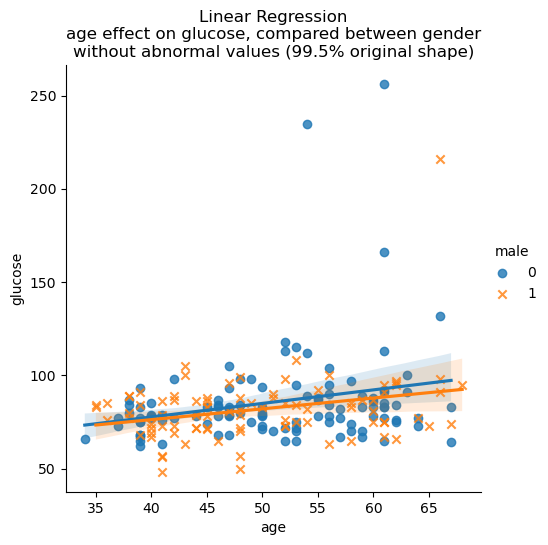

In [557]:
X_variables = ['totChol','heartRate','age']
y_var='glucose'
# y_normal = np.mean(sample[y]) + 2*np.std(sample[y])
y_sick = 300
normal_sample = sample[sample[y_var]<=y_sick]
normal_size_ratio = (normal_sample.shape[0]/sample.shape[0]) * 100
for x in X_variables:
    sns.lmplot(data=normal_sample, x=x, y=y_var, hue='male',
             markers=['o', 'x'])
    plt.title(f"Linear Regression\n"
              f"{x} effect on {y_var}, compared between gender"
              f"\nwithout abnormal values ({normal_size_ratio:0.3}% original shape)")
    plt.show()

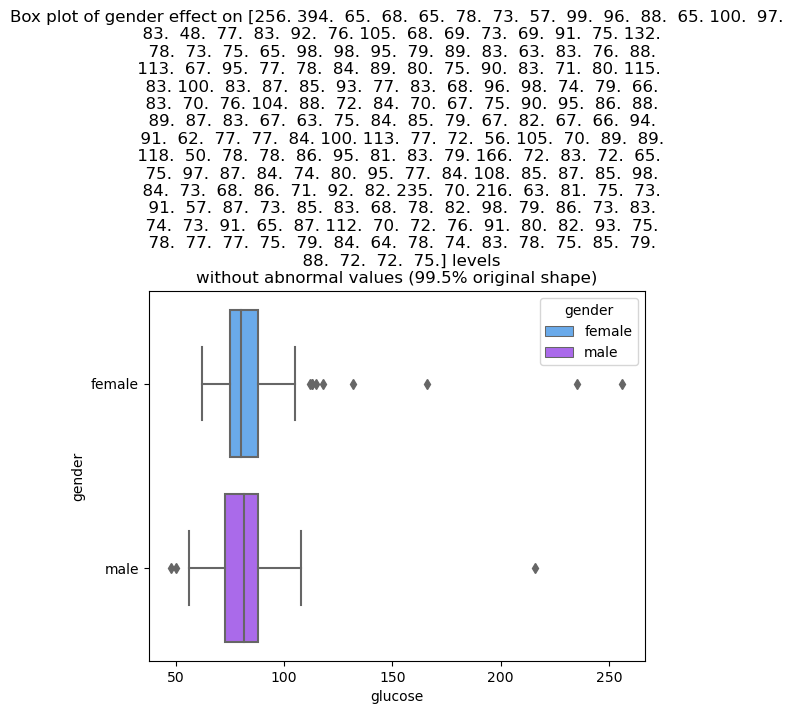

In [558]:
sns.boxplot(data=normal_sample, x='glucose', y='gender',
            orient='h',hue='gender',palette='cool',dodge=False)
plt.title(f"Box plot of gender effect on {y} levels"
          f"\nwithout abnormal values ({normal_size_ratio:0.3}% original shape)")
plt.show()

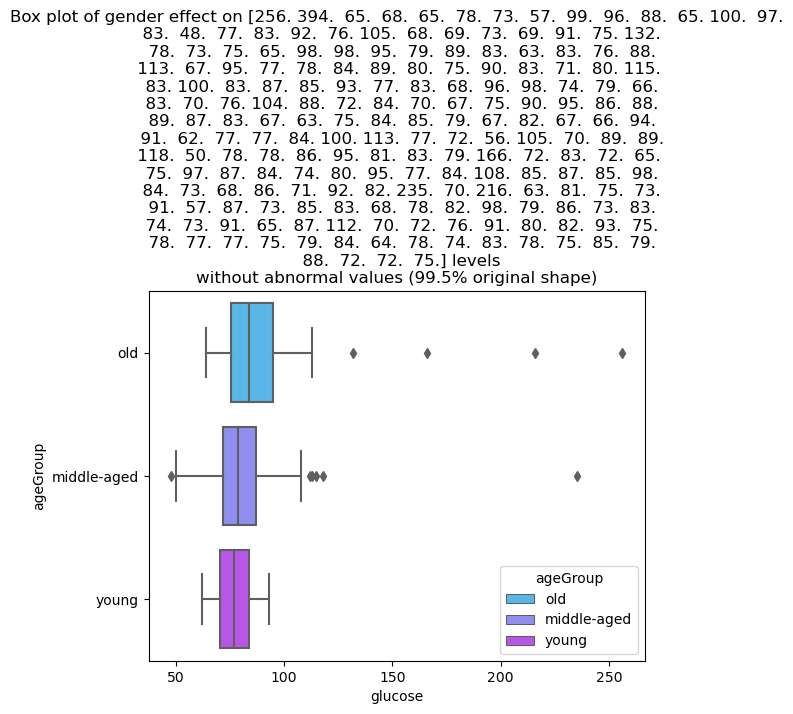

In [559]:
sns.boxplot(data=normal_sample, x='glucose', y='ageGroup',
            orient='h',palette='cool',dodge=False,hue='ageGroup')
plt.title(f"Box plot of gender effect on {y} levels"
          f"\nwithout abnormal values ({normal_size_ratio:0.3}% original shape)")
plt.show()

In [560]:
def calculate_beta(X,y):
    # Calculate MLE
    C = np.matmul(X.T, X)
    C_inv = np.linalg.inv(C)
    C_inv_X = np.matmul(C_inv, X.T)
    beta = np.matmul(C_inv_X, y)
    return np.round(beta,4)

In [561]:
#Q4
def model_display(data):
    X = data[['intercept','male',*X_variables]].to_numpy()
    y = data[y_var].to_numpy()
    beta = calculate_beta(X,y)
    print('Linear regression model is:\n'
          f'y = {beta[0]} + ({beta[1]})*x_1 + ({beta[2]})*x_2 + ({beta[3]})*x_3 + ({beta[4]})*x_4\n'
          f's.t:\n'
          f'y = glucose\n'
          f'x_1 = gender. '
          f'Value of 1(male) increases the y value by {beta[1]}\n'
          f'x_2 = totChol. '
          f'Increment of one unit in x_2 increases the y value by {beta[2]}\n'
          f'x_3 = heartRate. '
          f'Increment of one unit in x_3 increases the y value by {beta[3]}\n'
          f'x_4 = age. '
          f'Increment of one unit in x_4 increases the y value by {beta[4]}\n')
    return X,beta,y

In [574]:
#Q3
print(f'Data:= {sample_size} sampled data points from the original dataset')
X_sample,beta_sample,y_sample = model_display(sample)

Data:= 200 sampled data points from the original dataset
Linear regression model is:
y = 0.2294 + (3.1202)*x_1 + (0.111)*x_2 + (0.2032)*x_3 + (0.8297)*x_4
s.t:
y = glucose
x_1 = gender. Value of 1(male) increases the y value by 3.1202
x_2 = totChol. Increment of one unit in x_2 increases the y value by 0.111
x_3 = heartRate. Increment of one unit in x_3 increases the y value by 0.2032
x_4 = age. Increment of one unit in x_4 increases the y value by 0.8297



In [563]:
import scipy.stats as stats

#Q5
y = np.array(y_sample)
n = len(y_sample)
p = np.linalg.matrix_rank(X_sample)
y_hat = np.matmul(X_sample, beta_sample)
y_n = y.mean()
SSR = 0
SST = 0
SSres = 0
for i in range(n):
    SSR += (y_hat[i] - y_n)**2
    SST += (y[i] - y_n)**2
    SSres += (y[i] - y_hat[i])**2
Sum_Sq = [SSR, SSres, SST]
MSR = SSR / (p - 1)
MSres = SSres / (n - p)
MST = SST / (n - 1)
F_test = MSR / MSres
p_value = 1 - stats.f.cdf(F_test, p - 1, n - p)
F_list = f'p-value = {round(p_value,3)}, F = {round(F,3)}'
dof = [p - 1, n - p, n - 1]
MS = [MSR, MSres, MST]
anova_table = pd.DataFrame({'Sum of Squares': Sum_Sq, 'dof': dof, 'MS': MS, 'F': ''})
anova_table.loc[0, "F"] = F_list
anova_table.index = ['Regression', 'Residual/Errors', 'Total']
anova_table

,Sum of Squares,dof,MS,F
Regression,18049.978825,4,4512.494706,"p-value = 0.001, F = 4.735"
Residual/Errors,185853.750325,195,953.096156,
Total,203904.000000,199,1024.643216,


In [564]:
SSR = anova_table.loc['Regression', 'Sum of Squares']
SST = anova_table.loc['Total', 'Sum of Squares']
R_squared = SSR / SST
print(f'R squared = {R_squared:.3}')

MSres = anova_table.loc['Residual/Errors', 'MS']
MST = anova_table.loc['Total', 'MS']
R_squared_adj = 1 - (MSres / MST)
print(f'R squared adj = {R_squared_adj:.3}')

R squared = 0.0885
R squared adj = 0.0698


In [565]:
def calc_CI(X,y,beta_sample,beta_all,x_variables):
    n = X.shape[0]
    p = X.shape[1]
    C = np.linalg.inv(np.matmul(X.T,X))
    e = y - np.matmul(X, beta_sample)
    var_estimate = (1/(n-p))*sum([x**2 for x in e])
    z = stats.norm.ppf(0.975)
    for i, variable in enumerate(x_variables):
        std_estimate = np.sqrt(var_estimate*(C[i][i]))
        CI_beta_i = [beta_sample[i] - z*std_estimate, beta_sample[i] + z*std_estimate]
        print(f"CI for beta_{i} is: {CI_beta_i}")
        print(f"The CI of {'gender' if variable=='male' else variable} in the sample data contains the estimator of the original data:"
                f" {CI_beta_i[0] <= beta_all[i] <= CI_beta_i[1]}\n")

In [566]:
#Q6
print(f'Data:= original dataset')
X_all,beta_all,y_all = model_display(df)
calc_CI(X_sample,y_sample,beta_sample,beta_all,['intercept','male',*X_variables])


Data:= original dataset
Linear regression model is:
y = 48.9638 + (1.0621)*x_1 + (0.0037)*x_2 + (0.1949)*x_3 + (0.3397)*x_4
s.t:
y = glucose
x_1 = gender. Value of 1(male) increases the y value by 1.0621
x_2 = totChol. Increment of one unit in x_2 increases the y value by 0.0037
x_3 = heartRate. Increment of one unit in x_3 increases the y value by 0.1949
x_4 = age. Increment of one unit in x_4 increases the y value by 0.3397

CI for beta_0 is: [-44.547475385797945, 45.00627538579794]
The CI of intercept in the sample data contains the estimator of the original data: False

CI for beta_1 is: [-5.734123020309022, 11.974523020309023]
The CI of gender in the sample data contains the estimator of the original data: True

CI for beta_2 is: [0.011621205696876719, 0.21037879430312328]
The CI of totChol in the sample data contains the estimator of the original data: False

CI for beta_3 is: [-0.16810787850459846, 0.5745078785045985]
The CI of heartRate in the sample data contains the estimator

#Q7
The hypotheses are :
$$
H_0 : \beta^{*}_0 =..= \beta^{*}_4 = 0  \\
H_1 : \exists \beta^{*}_j \neq 0,\quad j\in \{1,..,4\} \\
T.S. : F = \frac{MS_R}{MS_{Res}} \\
R.R. : F > F_{(\alpha,k,n-p)}
$$

In [572]:
F_val  = 1-stats.f.cdf(0.95, p-1, n-p)
decision = 'reject' if F_test>F_val else 'dont reject'
print(f'We {decision} H0 with alpha=0.95')

We reject H0 with alpha=0.95


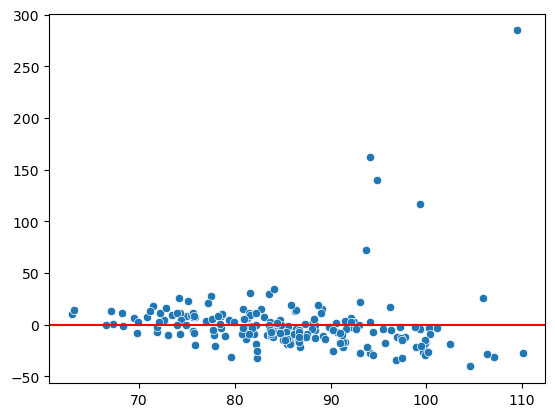

In [583]:
#Q8
e = y_sample - np.matmul(X_sample, beta_sample)
sns.scatterplot(x=np.matmul(X_sample, beta_sample),y=e)
plt.axhline(y=e.mean(), color = "red", label = "residuals mean value")